# Pacotes

TensorFlow: Biblioteca para construir e treinar modelos de aprendizado de máquina.

boston_housing: Dataset embutido no Keras contendo informações de preços de casas em Boston.

layers, models: Módulos do Keras para definir e estruturar redes neurais.

NumPy: Biblioteca para manipulação de arrays e cálculos numéricos.

Matplotlib: Biblioteca para visualização e gráficos.

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 24.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 56.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 56.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import os
import random
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

tf.config.experimental.enable_op_determinism()

2025-03-08 19:06:41.128965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 19:06:41.278332: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-08 19:06:41.340586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741460801.432839    6967 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741460801.476928    6967 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 19:06:41.638962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Importa Dataset Boston Housing

boston_housing.load_data(): Divide os dados em conjuntos de treino e teste.
Normalização: Reduz as diferenças de escala entre as features, melhorando a eficiência do treinamento.

In [4]:
# Carregar dados do conjunto Boston Housing Prices
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [7]:
# Normalizar os dados
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Tensorflow

## Define Modelo

Sequential: Modelo de rede neural em que camadas são empilhadas sequencialmente.

Camada 1: 32 neurônios, ativação ReLU, entrada compatível com as features.

Camada 2: 15 neurônios, ativação ReLU.

Camada 3: 1 neurônio, ativação linear, saída para prever o preço de uma casa (valor contínuo).

Dense: todos os neurônios da camada anterior se conectam com os da camada posterior


In [8]:
# Definir o modelo
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dense(15, activation='relu'),
    layers.Dense(1, activation='linear')  # Camada de saída para a previsão do preço da casa
])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-08 19:17:34.090716: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compila Modelo

Otimizador: RMSprop, ajusta os pesos da rede durante o treinamento.

Função de perda: Erro quadrático médio (MSE), mede a diferença entre previsões e valores reais.

Métrica: Erro médio absoluto (MAE), fornece a média das diferenças absolutas entre as previsões e os valores reais.

In [9]:
# Compilar o modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Treina Modelo

fit: Treina o modelo nos dados.

Épocas: Número de iterações completas sobre os dados (100).

Batch size: Número de amostras processadas antes de atualizar os pesos (1).

validation_split: Usa 20% dos dados de treinamento para validação.

verbose=0: Suprime a exibição detalhada do progresso.


In [ ]:
# Treinar o modelo
history = model.fit(train_data, train_targets, 
                    epochs=100, 
                    batch_size=1, 
                    verbose=0, 
                    validation_split=0.2)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,920 (7.50 KB)

 Trainable params: 959 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 961 (3.76 KB)

## Avalia Resultados

In [11]:
# Avaliar o modelo nos dados de teste
test_loss, test_mae = model.evaluate(test_data, test_targets)
print(f'Erro médio absoluto nos dados de teste: {test_mae:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.2432 - mae: 2.5099  
Erro médio absoluto nos dados de teste: 2.78


2025-03-08 19:26:15.624211: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


# Gráfico

Curvas de erro: Gráfico que mostra como o erro médio absoluto varia ao longo do treinamento.

mae: Erro no treinamento.

val_mae: Erro na validação.

Visualização: Ajuda a identificar problemas como overfitting ou underfitting.

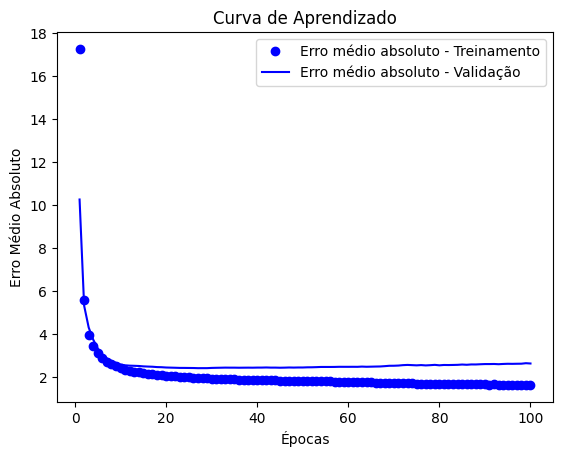

In [12]:
# Plotar a curva de aprendizado
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Erro médio absoluto - Treinamento')
plt.plot(epochs, val_mae, 'b', label='Erro médio absoluto - Validação')
plt.title('Curva de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Absoluto')
plt.legend()

# Previsões

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


2025-03-08 19:44:03.250539: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


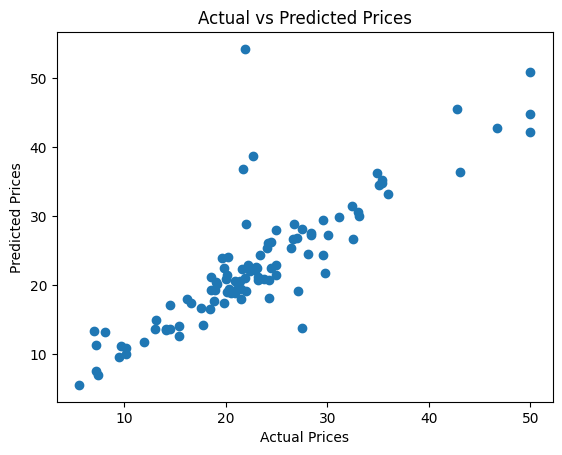

In [17]:
y_pred = model.predict(test_data)

# Plot predictions vs actual values
plt.scatter(test_targets, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()